# Fateme Fouladi

# ML HomeWork1

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. loading dataset

In [6]:
traindata=pd.read_csv('C:\\Users\\LEGION\\data_projects\\HW1\\train.csv')

In [7]:
traindata.head()

,x1,x2,labels
0,-1.872262,-0.999991,1.0
1,-1.047198,0.500973,0.0
2,0.031733,-0.286129,1.0
3,1.745329,2.482572,0.0
4,2.887727,2.294539,0.0


In [8]:
traindata.describe()

,x1,x2,labels
count,150.000000,150.000000,150.000000
mean,0.106201,0.725176,0.500000
std,1.847467,1.046417,0.501675
min,-3.078126,-0.999991,0.000000
25%,-1.475597,-0.096374,0.000000
50%,0.126933,0.714720,0.500000
75%,1.681863,1.478741,1.000000
max,3.141593,2.499021,1.000000


In [9]:
X=traindata.drop('labels',axis=1)
y=traindata['labels']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=50, random_state=42)

2) Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train_scale=scaler.fit_transform(X_train)
X_val_scale=scaler.transform(X_val)

3) Plotting train and validation data

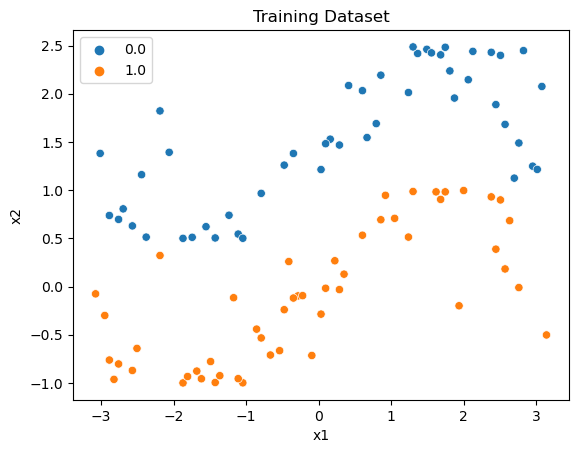

In [13]:
#plot train data
train_dataset=pd.concat([X_train, y_train], axis=1)
sns.scatterplot(data=train_dataset, x="x1", y="x2", hue="labels")
plt.title('Training Dataset')
plt.legend()
plt.show()

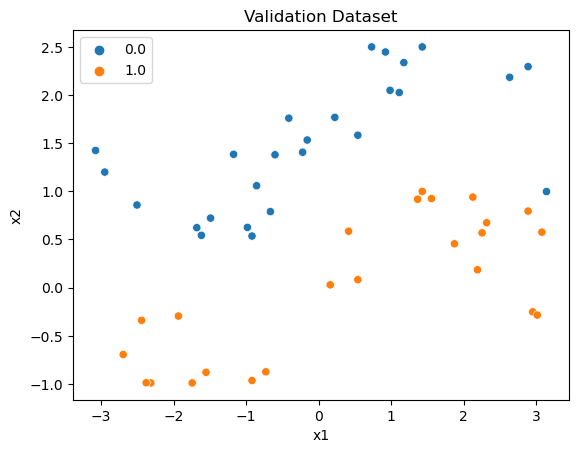

In [14]:
#plot validation data
val_dataset=pd.concat([X_val, y_val], axis=1)
sns.scatterplot(data=val_dataset, x="x1", y="x2", hue="labels")
plt.title('Validation Dataset')
plt.legend()
plt.show()

4) Training Perceptron algorithm

In [15]:
#model training
from sklearn.linear_model import Perceptron
perc_clf=Perceptron(max_iter=100,random_state=0)
perc_clf.fit(X_train_scale,y_train)

Perceptron(max_iter=100)

In [16]:
#predict val dataset
y_pred_train=perc_clf.predict(X_train_scale)
y_pred_val=perc_clf.predict(X_val_scale)

In [17]:
#evaluation
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train, y_pred_train)
val_acc=accuracy_score(y_val, y_pred_val)
print(f"Perceptron: Train accuracy: {train_acc} , Validation accuracy: {val_acc}")

Perceptron: Train accuracy: 0.92 , Validation accuracy: 0.92


c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


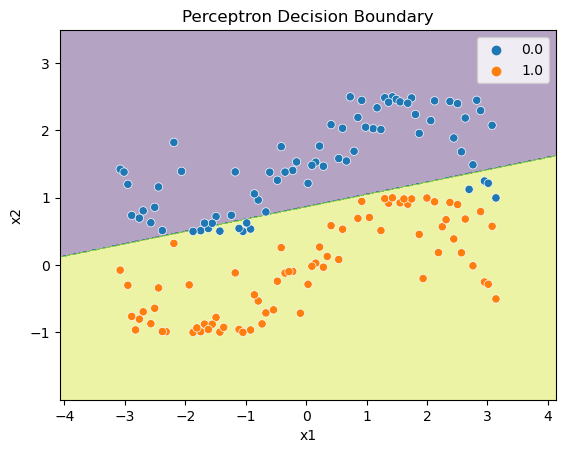

In [18]:
#plotting decision boundary using numpy's meshgrid

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

mesh_points = np.c_[xx1.ravel(), xx2.ravel()]
mesh_points_scale = scaler.transform(mesh_points)
mesh_predictions = perc_clf.predict(mesh_points_scale)

mesh_predictions = mesh_predictions.reshape(xx1.shape)

plt.contourf(xx1, xx2, mesh_predictions, alpha=0.4)
sns.scatterplot(data=traindata, x="x1", y="x2", hue="labels")

plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

5)Training Perceptron with Polynomial features of degree 2,3,5,10

Perceptron with polynomial feature of degree2: Train acc:0.85 ,Val acc:0.8


c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


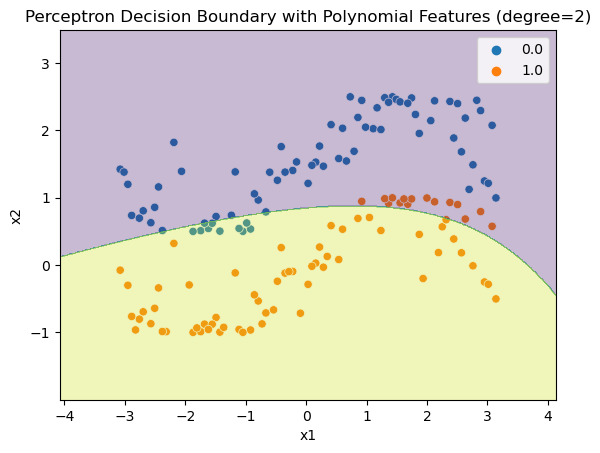



Perceptron with polynomial feature of degree3: Train acc:1.0 ,Val acc:1.0


c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


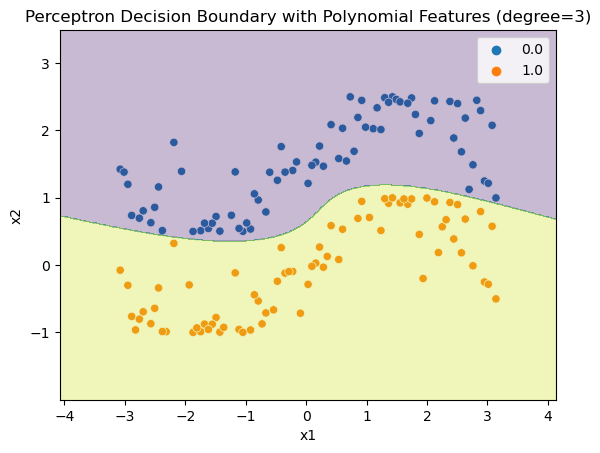



Perceptron with polynomial feature of degree5: Train acc:1.0 ,Val acc:1.0


c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


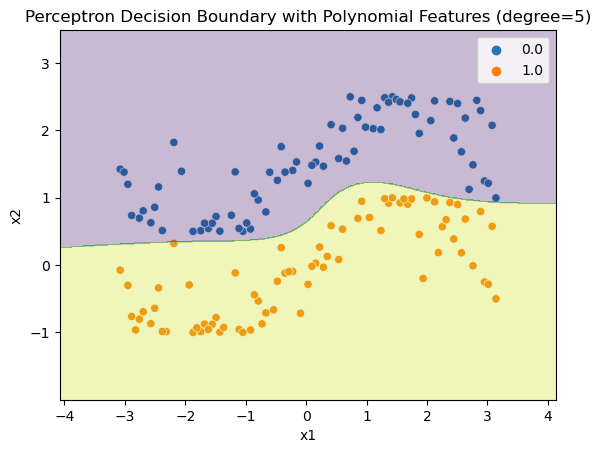



Perceptron with polynomial feature of degree10: Train acc:1.0 ,Val acc:0.98


c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


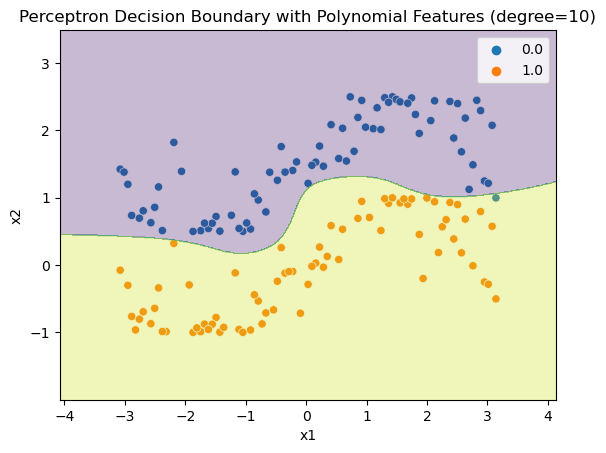

In [19]:
#Polynomial features
from sklearn.preprocessing import PolynomialFeatures

#split train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=50, random_state=42)

#normalization
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.transform(X_val)

#polynomial features
perc_clf = Perceptron(max_iter=100,random_state=0)
degrees=[2,3,5,10]
for deg in degrees:
  poly=PolynomialFeatures(degree=deg)
  X_train_poly = poly.fit_transform(X_train_scale)
  X_val_poly = poly.transform(X_val_scale)

  perc_clf.fit(X_train_poly, y_train)

  y_pred_train = perc_clf.predict(X_train_poly)
  y_pred_val = perc_clf.predict(X_val_poly)

  train_acc=accuracy_score(y_train,y_pred_train)
  val_acc = accuracy_score(y_val, y_pred_val)
  print(f"Perceptron with polynomial feature of degree{deg}: Train acc:{train_acc} ,Val acc:{val_acc}")

  sns.scatterplot(data=traindata, x="x1", y="x2", hue='labels')
  x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
  y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh_points = np.c_[xx.ravel(), yy.ravel()]
  mesh_points_scale = scaler.transform(mesh_points)
  mesh_points_poly = poly.transform(mesh_points_scale)
  mesh_predictions = perc_clf.predict(mesh_points_poly)
  mesh_predictions = mesh_predictions.reshape(xx.shape)
  plt.contourf(xx, yy, mesh_predictions, alpha=0.3)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(f'Perceptron Decision Boundary with Polynomial Features (degree={deg})')
  plt.legend()
  plt.show()
  print("\n")


Perceptron with polynomial feature of degree2: Train acc:0.85 ,Val acc:0.8


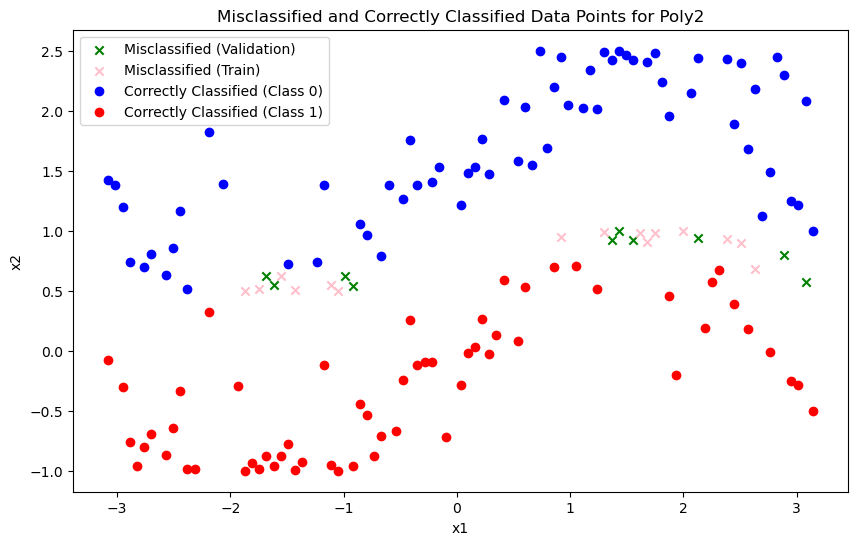



Perceptron with polynomial feature of degree3: Train acc:1.0 ,Val acc:1.0


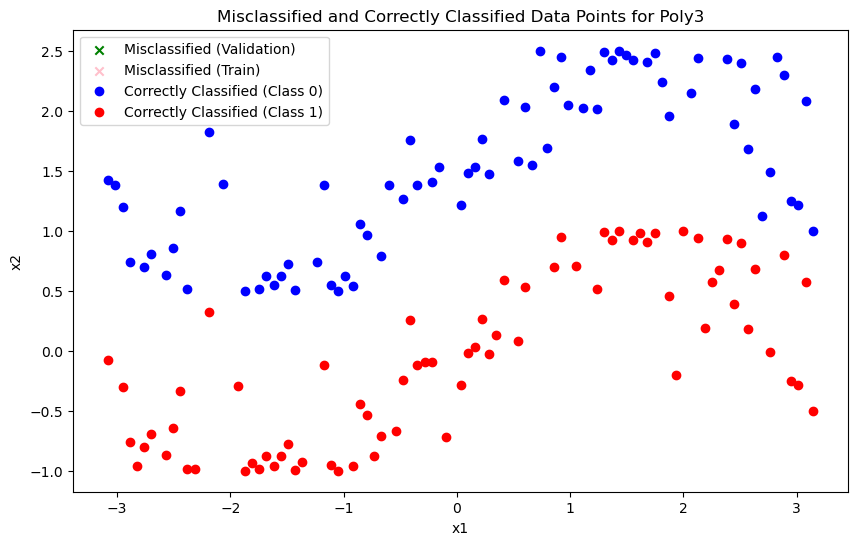



Perceptron with polynomial feature of degree5: Train acc:1.0 ,Val acc:1.0


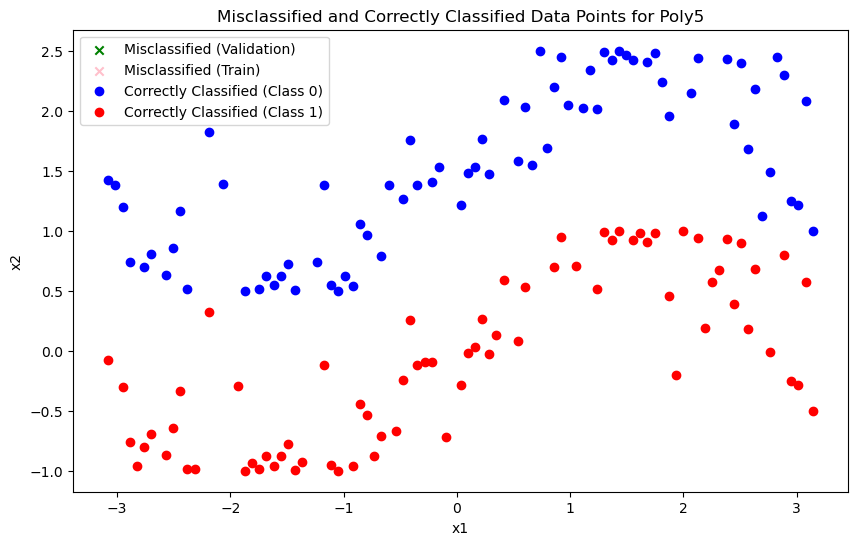



Perceptron with polynomial feature of degree10: Train acc:1.0 ,Val acc:0.98


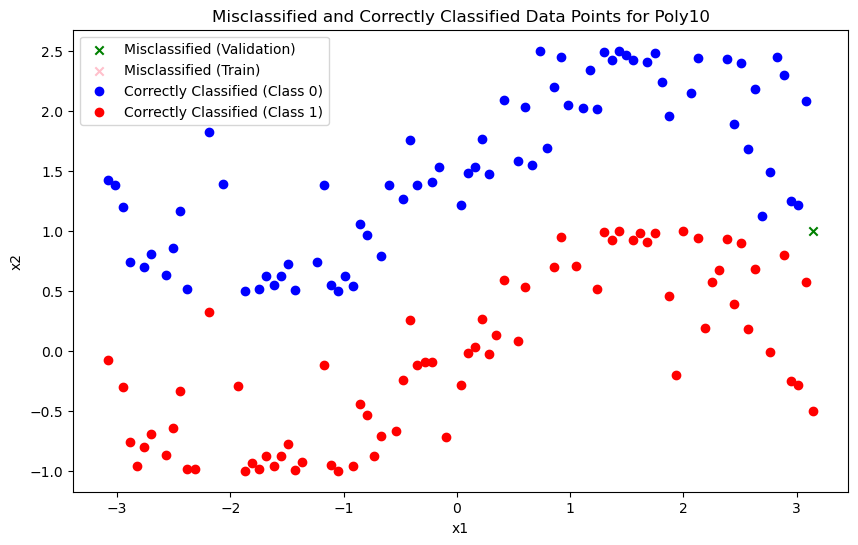

In [20]:
#Polynomial features
from sklearn.preprocessing import PolynomialFeatures

#split train and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=50, random_state=42)

#normalization
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.transform(X_val)

#polynomial features
perc_clf = Perceptron(max_iter=100,random_state=0)
degrees=[2,3,5,10]
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train_scale)
    X_val_poly = poly.transform(X_val_scale)

    perc_clf.fit(X_train_poly, y_train)

    y_pred_train = perc_clf.predict(X_train_poly)
    y_pred_val = perc_clf.predict(X_val_poly)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    print(f"Perceptron with polynomial feature of degree{deg}: Train acc:{train_acc} ,Val acc:{val_acc}")

    incorrect_indices_val = np.where(y_pred_val != y_val)[0]
    incorrect_data_val = X_val.values[incorrect_indices_val]

    incorrect_indices_train = np.where(y_pred_train != y_train)[0]
    incorrect_data_train = X_train.values[incorrect_indices_train]

    correct_indices_val = np.where(y_pred_val == y_val)[0]
    correct_data_val = X_val.values[correct_indices_val]

    correct_indices_train = np.where(y_pred_train == y_train)[0]
    correct_data_train = X_train.values[correct_indices_train]

    plt.figure(figsize=(10, 6))

    #plot of incorrectly classified data points
    plt.scatter(incorrect_data_val[y_val.values[incorrect_indices_val] == 0, 0],
                incorrect_data_val[y_val.values[incorrect_indices_val] == 0, 1],
                c='green', marker='x', label='Misclassified (Validation)')
    plt.scatter(incorrect_data_val[y_val.values[incorrect_indices_val] == 1, 0],
                incorrect_data_val[y_val.values[incorrect_indices_val] == 1, 1],
                c='green', marker='x')

    plt.scatter(incorrect_data_train[y_train.values[incorrect_indices_train] == 0, 0],
                incorrect_data_train[y_train.values[incorrect_indices_train] == 0, 1],
                c='pink', marker='x', label='Misclassified (Train)')
    plt.scatter(incorrect_data_train[y_train.values[incorrect_indices_train] == 1, 0],
                incorrect_data_train[y_train.values[incorrect_indices_train] == 1, 1],
                c='pink', marker='x')

    #plot of correctly classified data points
    plt.scatter(correct_data_val[y_val.values[correct_indices_val] == 0, 0],
                correct_data_val[y_val.values[correct_indices_val] == 0, 1],
                c='blue', marker='o', label='Correctly Classified (Class 0)')
    plt.scatter(correct_data_val[y_val.values[correct_indices_val] == 1, 0],
                correct_data_val[y_val.values[correct_indices_val] == 1, 1],
                c='red', marker='o', label='Correctly Classified (Class 1)')

    plt.scatter(correct_data_train[y_train.values[correct_indices_train] == 0, 0],
                correct_data_train[y_train.values[correct_indices_train] == 0, 1],
                c='blue', marker='o')
    plt.scatter(correct_data_train[y_train.values[correct_indices_train] == 1, 0],
                correct_data_train[y_train.values[correct_indices_train] == 1, 1],
                c='red', marker='o')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Misclassified and Correctly Classified Data Points for Poly{deg}')
    plt.legend()
    plt.show()
    print("\n")


6) Testing best model on test data

According to the explanations in the report, we choose Perceptron with polynomial features of degree 3 model as the best model.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


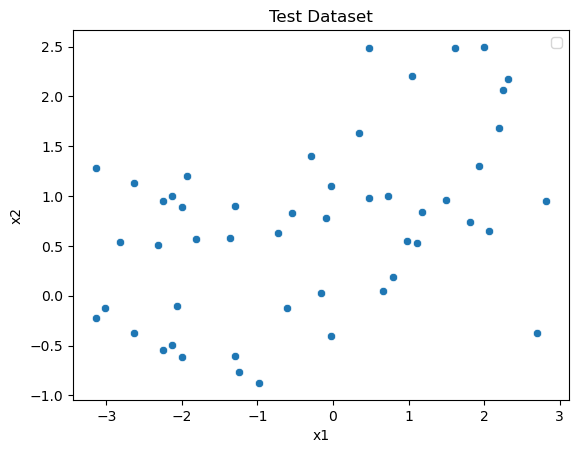

In [24]:
#scatter plot of test data
testdata=pd.read_csv('C:\\Users\\LEGION\\data_projects\\HW1\\test.csv')
sns.scatterplot(data=testdata, x="x1", y="x2")
plt.title('Test Dataset')
plt.legend()
plt.show()

In [25]:
#training poly3 model on testdata

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=50, random_state=42)

#normalization
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.transform(X_val)
X_test_scale=scaler.transform(testdata)
#polynomial features
perc_clf = Perceptron(max_iter=100, random_state=0)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scale)
X_val_poly = poly.transform(X_val_scale)
X_test_poly=poly.transform(X_test_scale)

perc_clf.fit(X_train_poly, y_train)

y_pred_train = perc_clf.predict(X_train_poly)
y_pred_val = perc_clf.predict(X_val_poly)
y_pred_test=perc_clf.predict(X_test_poly)

train_acc = accuracy_score(y_train, y_pred_train)
val_acc = accuracy_score(y_val, y_pred_val)
print(f"Perceptron with polynomial feature of degree 3: Train acc:{train_acc} ,Val acc:{val_acc}")
print('y_pred_test: ', y_pred_test)

Perceptron with polynomial feature of degree 3: Train acc:1.0 ,Val acc:1.0
y_pred_test:  [1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1.]


In [38]:
#saving predictions in a csv file
output_file_path = 'C:\\Users\\LEGION\\data_projects\\preds.csv'

df_y_pred_test=pd.DataFrame({'labels': y_pred_test})
df_y_pred_test.to_csv(output_file_path, index=False)

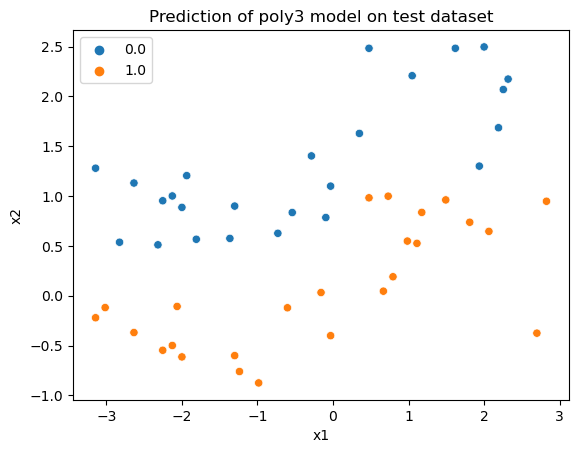

In [39]:
#plotting test data with predicted labels

testdata['labels']=y_pred_test
sns.scatterplot(data=testdata, x="x1", y="x2", hue='labels')
#sns.scatterplot(data=traindata, x="x1", y="x2", hue="labels")
plt.title('Prediction of poly3 model on test dataset')
plt.legend()
plt.show()